# df0 ★ 건별 (원본)

### 0_데이터 읽어오기

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv( "data\[이어드림스쿨] 차이코퍼레이션 데이터.csv" )
print(df.shape)
display(df.head(2))

(5623810, 13)


,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6


### 1_컬럼명 교체하기

In [2]:
### feature rename
before = df.columns
after = "id buy pre post c_back dscnt total push man frgn birth sign m_id".split()
dic = {x:y for x,y in zip(before,after)}
print(dic)

df = df.rename( columns=dic )
df.head(2)

{'customer_id': 'id', 'created_at': 'buy', 'pre_discount': 'pre', 'post_discount': 'post', 'cashback_amount': 'c_back', 'discount_amount': 'dscnt', 'total_promotion': 'total', 'push_permission': 'push', 'gender': 'man', 'is_foreigner': 'frgn', 'birthday': 'birth', 'sign_up_date': 'sign', 'merchant_id': 'm_id'}


,id,buy,pre,post,c_back,dscnt,total,push,man,frgn,birth,sign,m_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6


### 2_카테고리컬 컬럼(3개) 전처리

In [3]:
### push(알람), frgn(외국인): True/False ---> 1/0
df["push"] = df["push"].apply(lambda x:1 if x==True else 0)
df["frgn"] = df["frgn"].apply(lambda x:1 if x==True else 0)

### man(남): male/female ---> 1/0
df["man"] = df["man"].apply(lambda x:1 if x=="male" else 0)
df.head(2)

,id,buy,pre,post,c_back,dscnt,total,push,man,frgn,birth,sign,m_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09 08:21:14.098,6


### 3_나이 feature 추가

In [4]:
### age 생성 (2020년 기준 한국나이)
df[["buy","sign","birth"]] = df[["buy","sign","birth"]].astype("datetime64")
df["age"] = 2020 - df["birth"].dt.year + 1
df.head(2)

,id,buy,pre,post,c_back,dscnt,total,push,man,frgn,birth,sign,m_id,age
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,1,0,0,1957-11-05,2019-11-30 16:48:19.339,9,64
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,1,0,0,1983-10-23,2019-07-09 08:21:14.098,6,38


### 4_각종 정렬

In [5]:
### feature 순서조절 = 고객정보 + 거래정보
df = df[['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign',         # 고객 정보
        'buy', 'm_id', 'pre', 'post', 'c_back', 'dscnt', 'total' ]]   # 거래 정보

### data(행) 정렬: 1순위) buy(구매시점:오름차순) --> 2순위) id(유저코드:오름차순) 순서로 정렬
df = df.sort_values( by=["buy","id"], ascending=[True,True] )

### 인덱스 초기화
df = df.reset_index(drop=True)

### 5_데이터 저장

In [8]:
### parquet 포맷으로 저장
df.to_parquet( "data\df0.parquet", engine="pyarrow", compression='gzip' )

In [7]:
### 원본 읽어와서 한번에 전처리 하려면..
import numpy as np
import pandas as pd
df = pd.read_csv( "data\[이어드림스쿨] 차이코퍼레이션 데이터.csv" )
display(df.head(2))

### 완성된 전처리 함수
def pre0(df):
    before = df.columns
    after = "id buy pre post c_back dscnt total push man frgn birth sign m_id".split()
    dic = {x:y for x,y in zip(before,after)}
    df = df.rename( columns=dic )
    df["push"] = df["push"].apply(lambda x:1 if x==True else 0)
    df["frgn"] = df["frgn"].apply(lambda x:1 if x==True else 0)
    df["man"] = df["man"].apply(lambda x:1 if x=="male" else 0)
    df[["buy","sign","birth"]] = df[["buy","sign","birth"]].astype("datetime64")
    df["age"] = 2020 - df["birth"].dt.year + 1
    df = df[['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign',
            'buy', 'm_id', 'pre', 'post', 'c_back', 'dscnt', 'total' ]]
    df = df.sort_values( by=["buy","id"], ascending=[True,True] )
    df = df.reset_index(drop=True)
    return df

### 결과물
df = pre0(df)
display(df.head(2))

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000


### 6_(앞으로 사용할 셀)

In [9]:
import numpy as np
import pandas as pd

### df0: 건별 원본 데이터
df0 = pd.read_parquet( "data\df0.parquet" )
print(df0.shape)
display(df0.head(2))

(5623810, 14)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000


# df1 ★ 건별 (피쳐 확장)

### 0_데이터 읽어오기

In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35

### 원본 읽어오기
df0 = pd.read_parquet( "data\df0.parquet" )
print(df0.shape)
display(df0.head(2))

(5623810, 14)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000


### 1_페이백비율(%), 할인률(%), 종합혜택률(%)

In [11]:
df = df0

### c_back_R, dscnt_R, total_R: 전체금액 대비 이득 금액 
df["c_back_R"] = round(  100*df.c_back / df.pre, 1  )
df["dscnt_R"]  = round(  100*df.dscnt  / df.pre, 1  )
df["total_R"]  = round(  100*df.total  / df.pre, 1  )

### (샘플 확인)
cols = ['pre','post','c_back','dscnt','total','c_back_R','dscnt_R','total_R']
df[cols].head(3)

,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R
0,43000,35000,0,8000,8000,0.0,18.6,18.6
1,10900,5900,0,5000,5000,0.0,45.9,45.9
2,10900,5900,0,5000,5000,0.0,45.9,45.9


### 2_거래시점 추출

In [12]:
### 거래시점 추출
df["buy_cut"] = df["buy"].dt.date.astype("datetime64")   ### (시간 절삭)
df["buy_y"]   = df["buy"].dt.year                        ### 거래 년도
df["buy_m"]   = df["buy"].dt.month                       ### 거래 월
df["buy_d"]   = df["buy"].dt.day                         ### 거래 일
df["buy_7"]   = df["buy"].dt.weekday                     ### 거래 요일 (월:0, 화:1, 수:2 ... 토:5, 일:6)
""" 월요일=0 부터 시작함에 유의해야 합니다 """

# ## (일요일부터 0 만드려면 아래 코드)
# df["buy_7"] = df["buy"].dt.day_name() #---> Sunday ~ Saturday
# dic = {"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6}
# df["buy_7"] = df["buy_7"].apply(lambda x: dic[x]) #---> 0 ~ 6

### (샘플 확인)
cols = ['buy','buy_cut','buy_y','buy_m','buy_d','buy_7']
df[cols].head(3)

,buy,buy_cut,buy_y,buy_m,buy_d,buy_7
0,2019-08-01 00:32:56.331,2019-08-01,2019,8,1,3
1,2019-08-01 00:32:56.346,2019-08-01,2019,8,1,3
2,2019-08-01 00:32:57.160,2019-08-01,2019,8,1,3


### 3_카운트용 피쳐 생성, 정렬

In [13]:
### 이후 groupby().sum() 합계 구할때 ---> 합쳐진 data 갯수 카운트
df["cnt_b"] = 1
df.head(2)

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1


### 4_데이터 저장

In [16]:
### parquet 포맷으로 저장
df.to_parquet( "data\df1.parquet", engine="pyarrow", compression='gzip' )

In [15]:
### 원본 읽어와서 한번에 전처리 하려면..
import numpy as np
import pandas as pd
df = pd.read_parquet( "data\df0.parquet" )
print(df.shape)
display(df.head(2))

### 완성된 전처리 함수
def pre1(df):
    df["c_back_R"] = round(  100*df.c_back / df.pre, 1  )
    df["dscnt_R"]  = round(  100*df.dscnt  / df.pre, 1  )
    df["total_R"]  = round(  100*df.total  / df.pre, 1  )
    df["buy_cut"] = df["buy"].dt.date.astype("datetime64")
    df["buy_y"]   = df["buy"].dt.year
    df["buy_m"]   = df["buy"].dt.month
    df["buy_d"]   = df["buy"].dt.day
    df["buy_7"]   = df["buy"].dt.weekday
    df["cnt_b"] = 1
    df["cnt_b"] = df["cnt_b"]
    return df
    
### 결과물
df = pre1(df)
print(df.shape)
display(df.head(2))

(5623810, 14)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000


(5623810, 23)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1


### 5_(앞으로 사용할 셀)

In [17]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)  ## 생략 없이 한 번에 띄울 피쳐수 = 50

### df1: 건별 피쳐확장 데이터
df1 = pd.read_parquet( "data\df1.parquet" )
print(df1.shape)
display(df1.head(2))

(5623810, 23)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1


# df2 ★ 개인별

### 0_데이터 읽어오기

In [18]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35

### df1: 건별 피쳐확장 데이터
df1 = pd.read_parquet( "data\df1.parquet" )
print(df1.shape)
display(df1.head(2))

(5623810, 23)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1


### 1_groupby전 feature 전처리
- 개인별 단위로 압축 전, 원핫인코딩이 필요한 피쳐는 미리 피쳐 분할을 시켜둬야 한다.

In [19]:
df = df1

### 1) m_id (상업코드) ---> 원핫 인코딩
df = pd.get_dummies(  data=df, columns=["m_id"]  )
dic = {f"m_id_{i}":f"m_{i}" for i in range(1,11)}  ## 이름 짧게 바꾸기
df = df.rename( columns=dic )

### (샘플 확인)
df.loc[:,"m_1":"m_10"].head(2)

,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0


### 2_groupby: 개인 단위

In [20]:
### feature 살펴보기
print(df.shape)
df.head(2)

(5623810, 32)


,id,age,man,push,frgn,birth,sign,buy,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1,0,0,0,0,0,0,0,0,1,0
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1,0,0,0,0,0,0,1,0,0,0


In [21]:
### 1) 유저별(id) 그룹바이시 값을 그대로 살려둘 feature 선정 ---> max()
cols = ['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign']
df_max = df[cols].groupby(by="id").max()
df_max = df_max.reset_index()

print(df_max.shape)
display(df_max.head(2))

(544921, 7)


,id,age,man,push,frgn,birth,sign
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757


In [22]:
### 2) 유저별(id) 그룹바이시 값을 모두 더할 feature 선정 ---> sum()
cols = ['id', 'pre', 'post', 'c_back', 'dscnt', 'total', 'cnt_b',
        'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']
df_sum = df[cols].groupby(by="id").sum()
df_sum = df_sum.reset_index()

print(df_sum.shape)
display(df_sum.head(2))

(544921, 17)


,id,pre,post,c_back,dscnt,total,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,24330,18960,0,5370,5370,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,25030,19359,0,5671,5671,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [23]:
### 3) 두 테이블 합치기
df = pd.merge( df_max, df_sum, how="left", on=["id"] )
df = df.sort_values(by=["id"], ascending=[True])

print(df.shape)
display(df.head())

(544921, 23)


,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,24330,18960,0,5370,5370,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,25030,19359,0,5671,5671,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,40,1,1,0,1981-09-09,2019-08-24 16:43:13.693,18120,13440,0,4680,4680,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,35,1,1,0,1986-10-18,2019-07-27 20:35:40.581,227640,216980,0,10660,10660,8,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,1.0
4,5,44,0,1,0,1977-05-26,2020-01-11 12:28:23.167,65170,55170,0,10000,10000,6,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0


### 3_추가 피쳐 생성, 정렬

In [24]:
### 1) 카운트용 피쳐 생성
df["cnt_p"] = 1
df.head(2)

,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,cnt_p
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,24330,18960,0,5370,5370,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,25030,19359,0,5671,5671,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [25]:
### 2) 페이백비율(%), 할인률(%), 종합혜택률(%)

### c_back_R, dscnt_R, total_R: 전체금액 대비 이득 금액 
df["c_back_R"] = round(  100*df.c_back / df.pre, 1  )
df["dscnt_R"]  = round(  100*df.dscnt  / df.pre, 1  )
df["total_R"]  = round(  100*df.total  / df.pre, 1  )

### (샘플 확인)
cols = ['pre','post','c_back','dscnt','total','c_back_R','dscnt_R','total_R']
df[cols].head(3)

,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R
0,24330,18960,0,5370,5370,0.0,22.1,22.1
1,25030,19359,0,5671,5671,0.0,22.7,22.7
2,18120,13440,0,4680,4680,0.0,25.8,25.8


In [26]:
### 3) 가입 시점 추출
df["sign_cut"] = df["sign"].dt.date.astype("datetime64")   ### (시간 절삭)
df["sign_y"]   = df["sign"].dt.year                        ### 거래 년도
df["sign_m"]   = df["sign"].dt.month                       ### 거래 월
df["sign_d"]   = df["sign"].dt.day                         ### 거래 일

### (샘플 확인)
cols = ['sign','sign_cut','sign_y','sign_m','sign_d']
df[cols].head(3)

,sign,sign_cut,sign_y,sign_m,sign_d
0,2019-08-25 18:28:34.815,2019-08-25,2019,8,25
1,2019-08-09 17:16:59.757,2019-08-09,2019,8,9
2,2019-08-24 16:43:13.693,2019-08-24,2019,8,24


In [27]:
### feature 살펴보기
print(df.shape)
df.head(2)

(544921, 31)


,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,cnt_p,c_back_R,dscnt_R,total_R,sign_cut,sign_y,sign_m,sign_d
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,24330,18960,0,5370,5370,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,22.1,22.1,2019-08-25,2019,8,25
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,25030,19359,0,5671,5671,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,22.7,22.7,2019-08-09,2019,8,9


In [28]:
### 4) 정렬
cols = ['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign', 'sign_cut', 'sign_y', 'sign_m', 'sign_d',  ### 개인 정보
        'pre', 'post', 'c_back', 'dscnt', 'total', 'c_back_R', 'dscnt_R', 'total_R',                    ### 금액 정보
        'cnt_p', 'cnt_b', 'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']        ### 카운트, 상업코드
df = df[cols]

print(df.shape)
display(df.head(2))

(544921, 31)


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,2019-08-09,2019,8,9,25030,19359,0,5671,5671,0.0,22.7,22.7,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 4_데이터 저장

In [29]:
### feature 간소화
cols = ['sign_cut', 'sign_y', 'sign_m', 'sign_d',                               ## 가입일 관련
        'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']  ## 상업코드
df2 = df.drop( cols, axis=1 )

print(df2.shape)
display(df2.head(2))

(544921, 17)


,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,25030,19359,0,5671,5671,0.0,22.7,22.7,1,2


In [32]:
### parquet 포맷으로 저장
df2.to_parquet( "data\df2.parquet", engine="pyarrow", compression='gzip' )

### 풀데이터 저장
df.to_parquet( "data\df3.parquet", engine="pyarrow", compression='gzip' )

In [31]:
### 원본 읽어와서 한번에 전처리 하려면..
import numpy as np
import pandas as pd

df = pd.read_parquet( "data\df1.parquet" )
print(df.shape)
display(df.head(2))

### 완성된 전처리 함수
def pre3(df):
    df = pd.get_dummies(  data=df, columns=["m_id"]  )
    dic = {f"m_id_{i}":f"m_{i}" for i in range(1,11)}
    df = df.rename( columns=dic )
    cols = ['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign']
    df_max = df[cols].groupby(by="id").max()
    df_max = df_max.reset_index()    
    cols = ['id', 'pre', 'post', 'c_back', 'dscnt', 'total', 'cnt_b',
            'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']
    df_sum = df[cols].groupby(by="id").sum()
    df_sum = df_sum.reset_index()
    df = pd.merge( df_max, df_sum, how="left", on=["id"] )
    df = df.sort_values(by=["id"], ascending=[True])
    df["cnt_p"] = 1
    df["c_back_R"] = round(  100*df.c_back / df.pre, 1  )
    df["dscnt_R"]  = round(  100*df.dscnt  / df.pre, 1  )
    df["total_R"]  = round(  100*df.total  / df.pre, 1  )
    df["sign_cut"] = df["sign"].dt.date.astype("datetime64")
    df["sign_y"]   = df["sign"].dt.year
    df["sign_m"]   = df["sign"].dt.month
    df["sign_d"]   = df["sign"].dt.day
    cols = ['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign', 'sign_cut', 'sign_y', 'sign_m', 'sign_d',
            'pre', 'post', 'c_back', 'dscnt', 'total', 'c_back_R', 'dscnt_R', 'total_R',
            'cnt_p', 'cnt_b', 'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']
    df = df[cols]
    return df

def pre2(df):
    cols = ['sign_cut', 'sign_y', 'sign_m', 'sign_d',
            'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']
    df = df.drop( cols, axis=1 )
    return df

### 결과물
df = pre3(df)
print(df.shape)
display(df.head(2))

df2 = pre2(df)
print(df2.shape)
display(df2.head(2))

(5623810, 23)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1


(544921, 31)


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,2019-08-09,2019,8,9,25030,19359,0,5671,5671,0.0,22.7,22.7,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


(544921, 17)


,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,25030,19359,0,5671,5671,0.0,22.7,22.7,1,2


# 마무리 (활용편)
- 아래 셀 1개만 복사해서 쓰세요!

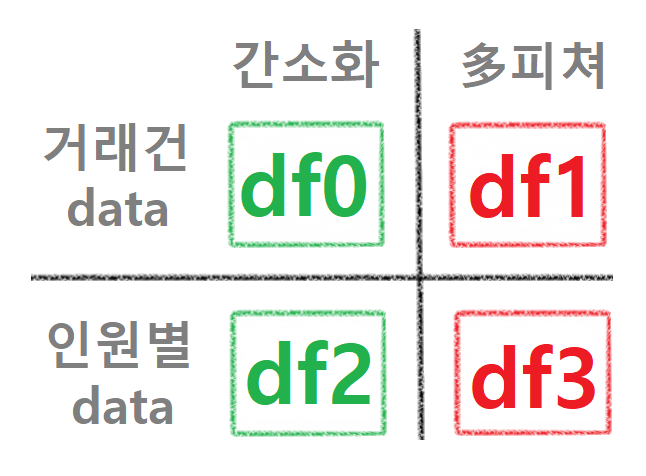

In [33]:
from IPython.display import Image
Image( r'info.png', width=500 )

In [34]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35

df0 = pd.read_parquet( "data\df0.parquet" )
df1 = pd.read_parquet( "data\df1.parquet" )  ### 추가 피쳐: 페이백율, 할인률, 종합혜택률, 구매시각추출, 구매건카운트
df2 = pd.read_parquet( "data\df2.parquet" )
df3 = pd.read_parquet( "data\df3.parquet" )  ### 추가 피쳬: 가입시각추출, 상업코드

print(df0.shape, df1.shape, df2.shape, df3.shape, sep=" "*5)
display(df0.head(2))
display(df1.head(2))
display(df2.head(2))
display(df3.head(2))

(5623810, 14)     (5623810, 23)     (544921, 17)     (544921, 31)


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000,0.0,45.9,45.9,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,25030,19359,0,5671,5671,0.0,22.7,22.7,1,2


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,26,0,0,0,1995-07-03,2019-08-09 17:16:59.757,2019-08-09,2019,8,9,25030,19359,0,5671,5671,0.0,22.7,22.7,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
